In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import odeint  
import math
from scipy.signal import find_peaks

In [2]:
def sdot(s,t,params):
    k40, k4, a, k6, k1aaCT, k7 = params 
    u, v, y = s
    
    du = k4*(v-u)*(a+u**2)-k6*u
    dv = k1aaCT-k6*u
    dy = k1aaCT-k7*(y-v) # w ~= v
    ds = [du, dv, dy]
    return ds

In [3]:
# Parameter values
k40 = 0.018
k4 = 180
a = k40/k4
k6 = 1
k1aaCT = 0.015
k7 = 0.6
params = [k40, k4, a, k6, k1aaCT, k7]

In [4]:
# Initial conditions
u0 = 0
v0 = 0.25
y0 = 0.25
s0 = [u0, v0, y0]

In [5]:
# Time observation
t_start = 0
t_end = 500
t_obs = np.linspace(t_start, t_end, t_end*10000)

In [6]:
# Run simulation
s_obs = odeint(sdot,s0,t_obs,args=(params,) ) 
du_obs = s_obs[:,0]
dv_obs = s_obs[:,1]
dy_obs = s_obs[:,2]

In [7]:
### estimate the period and amplitude
peaku,_ = find_peaks(du_obs, height=0)
peaky,_ = find_peaks(dy_obs, height=0)
troughu, _= find_peaks(-du_obs)
troughy, _= find_peaks(-dy_obs)

# period
from scipy.signal import peak_prominences
pro_pu = peak_prominences(du_obs, peaku)
distance_pu = t_obs[pro_pu[2][1:]]
for i in range(0, len(distance_pu)):
    period_pu = distance_pu[i]-distance_pu[i-1]
    print (period_pu, end=' , ')
print ('\n')

pro_py = peak_prominences(dy_obs, peaky)
distance_py = t_obs[pro_py[2][1:]]
for i in range(0, len(distance_py)):
    period_py = distance_py[i]-distance_py[i-1]
    print (period_py, end=' , ')
print ('\n')

pro_tu = peak_prominences(du_obs, troughu)
distance_tu = t_obs[pro_tu[2][1:]]
for i in range(0, len(distance_tu)):
    period_tu = distance_tu[i]-distance_tu[i-1]
    print (period_tu, end=' , ')
print ('\n')

pro_ty = peak_prominences(dy_obs, troughy)
distance_ty = t_obs[pro_ty[2][1:]]
for i in range(0, len(distance_ty)):
    period_ty = distance_ty[i]-distance_ty[i-1]
    print (period_ty, end=' , ')
print ('\n\n\n\n\n')

#amplitude
print ('u amplitude')
for i in range(0,5):
    ampu = du_obs[peaku[i]]-du_obs[troughu[i]]
    print (ampu, end=' , ')
print ('\n')
print ('y amplitude')
for i in range(0,5):
    ampy = dy_obs[peaky[i]]-dy_obs[troughy[i]]
    print (ampy, end=' , ')
print ('\n\n\n\n\n')


#period function**
for i in range(0,4):
    period = t_obs[peaku[i+1]]-t_obs[peaku[i]]
    print (period)

-427.1741854348371 , 213.58704271740854 , -142.3914284782857 , 35.597907119581436 , 35.59780711956142 , 35.59790711958141 , 35.59780711956142 , 35.59780711956142 , 35.597907119581464 , 35.59780711956142 , 35.59790711958141 , 35.59780711956142 , 35.59790711958141 , 

-427.1741854348371 , 71.19571423914286 , 0.0 , 35.59780711956142 , 35.59780711956142 , 71.19571423914286 , 0.0 , 35.59790711958141 , 35.59780711956142 , 35.59780711956142 , 35.597907119581464 , 71.19571423914283 , 0.0 , 

-427.1741854348371 , 35.59780711956143 , 35.59780711956142 , 35.597907119581436 , 35.59780711956142 , 35.59790711958141 , 35.59780711956142 , 35.59780711956142 , 35.597907119581464 , 35.59780711956142 , 35.59790711958141 , 35.59780711956142 , 35.59790711958141 , 

-427.1741854348371 , 35.597807119561416 , 35.597907119581436 , 35.59780711956142 , 35.59780711956142 , 35.597907119581436 , 35.59780711956142 , 35.59790711958141 , 35.59780711956142 , 35.59780711956142 , 35.597907119581464 , 35.59780711956142 , 3

/var/folders/sq/cbp1x8813_ldgl9g9m9b4gc00000gn/T/ipykernel_78906/2925572865.py:23: PeakPropertyWarning: some peaks have a prominence of 0
  pro_tu = peak_prominences(du_obs, troughu)
/var/folders/sq/cbp1x8813_ldgl9g9m9b4gc00000gn/T/ipykernel_78906/2925572865.py:30: PeakPropertyWarning: some peaks have a prominence of 0
  pro_ty = peak_prominences(dy_obs, troughy)


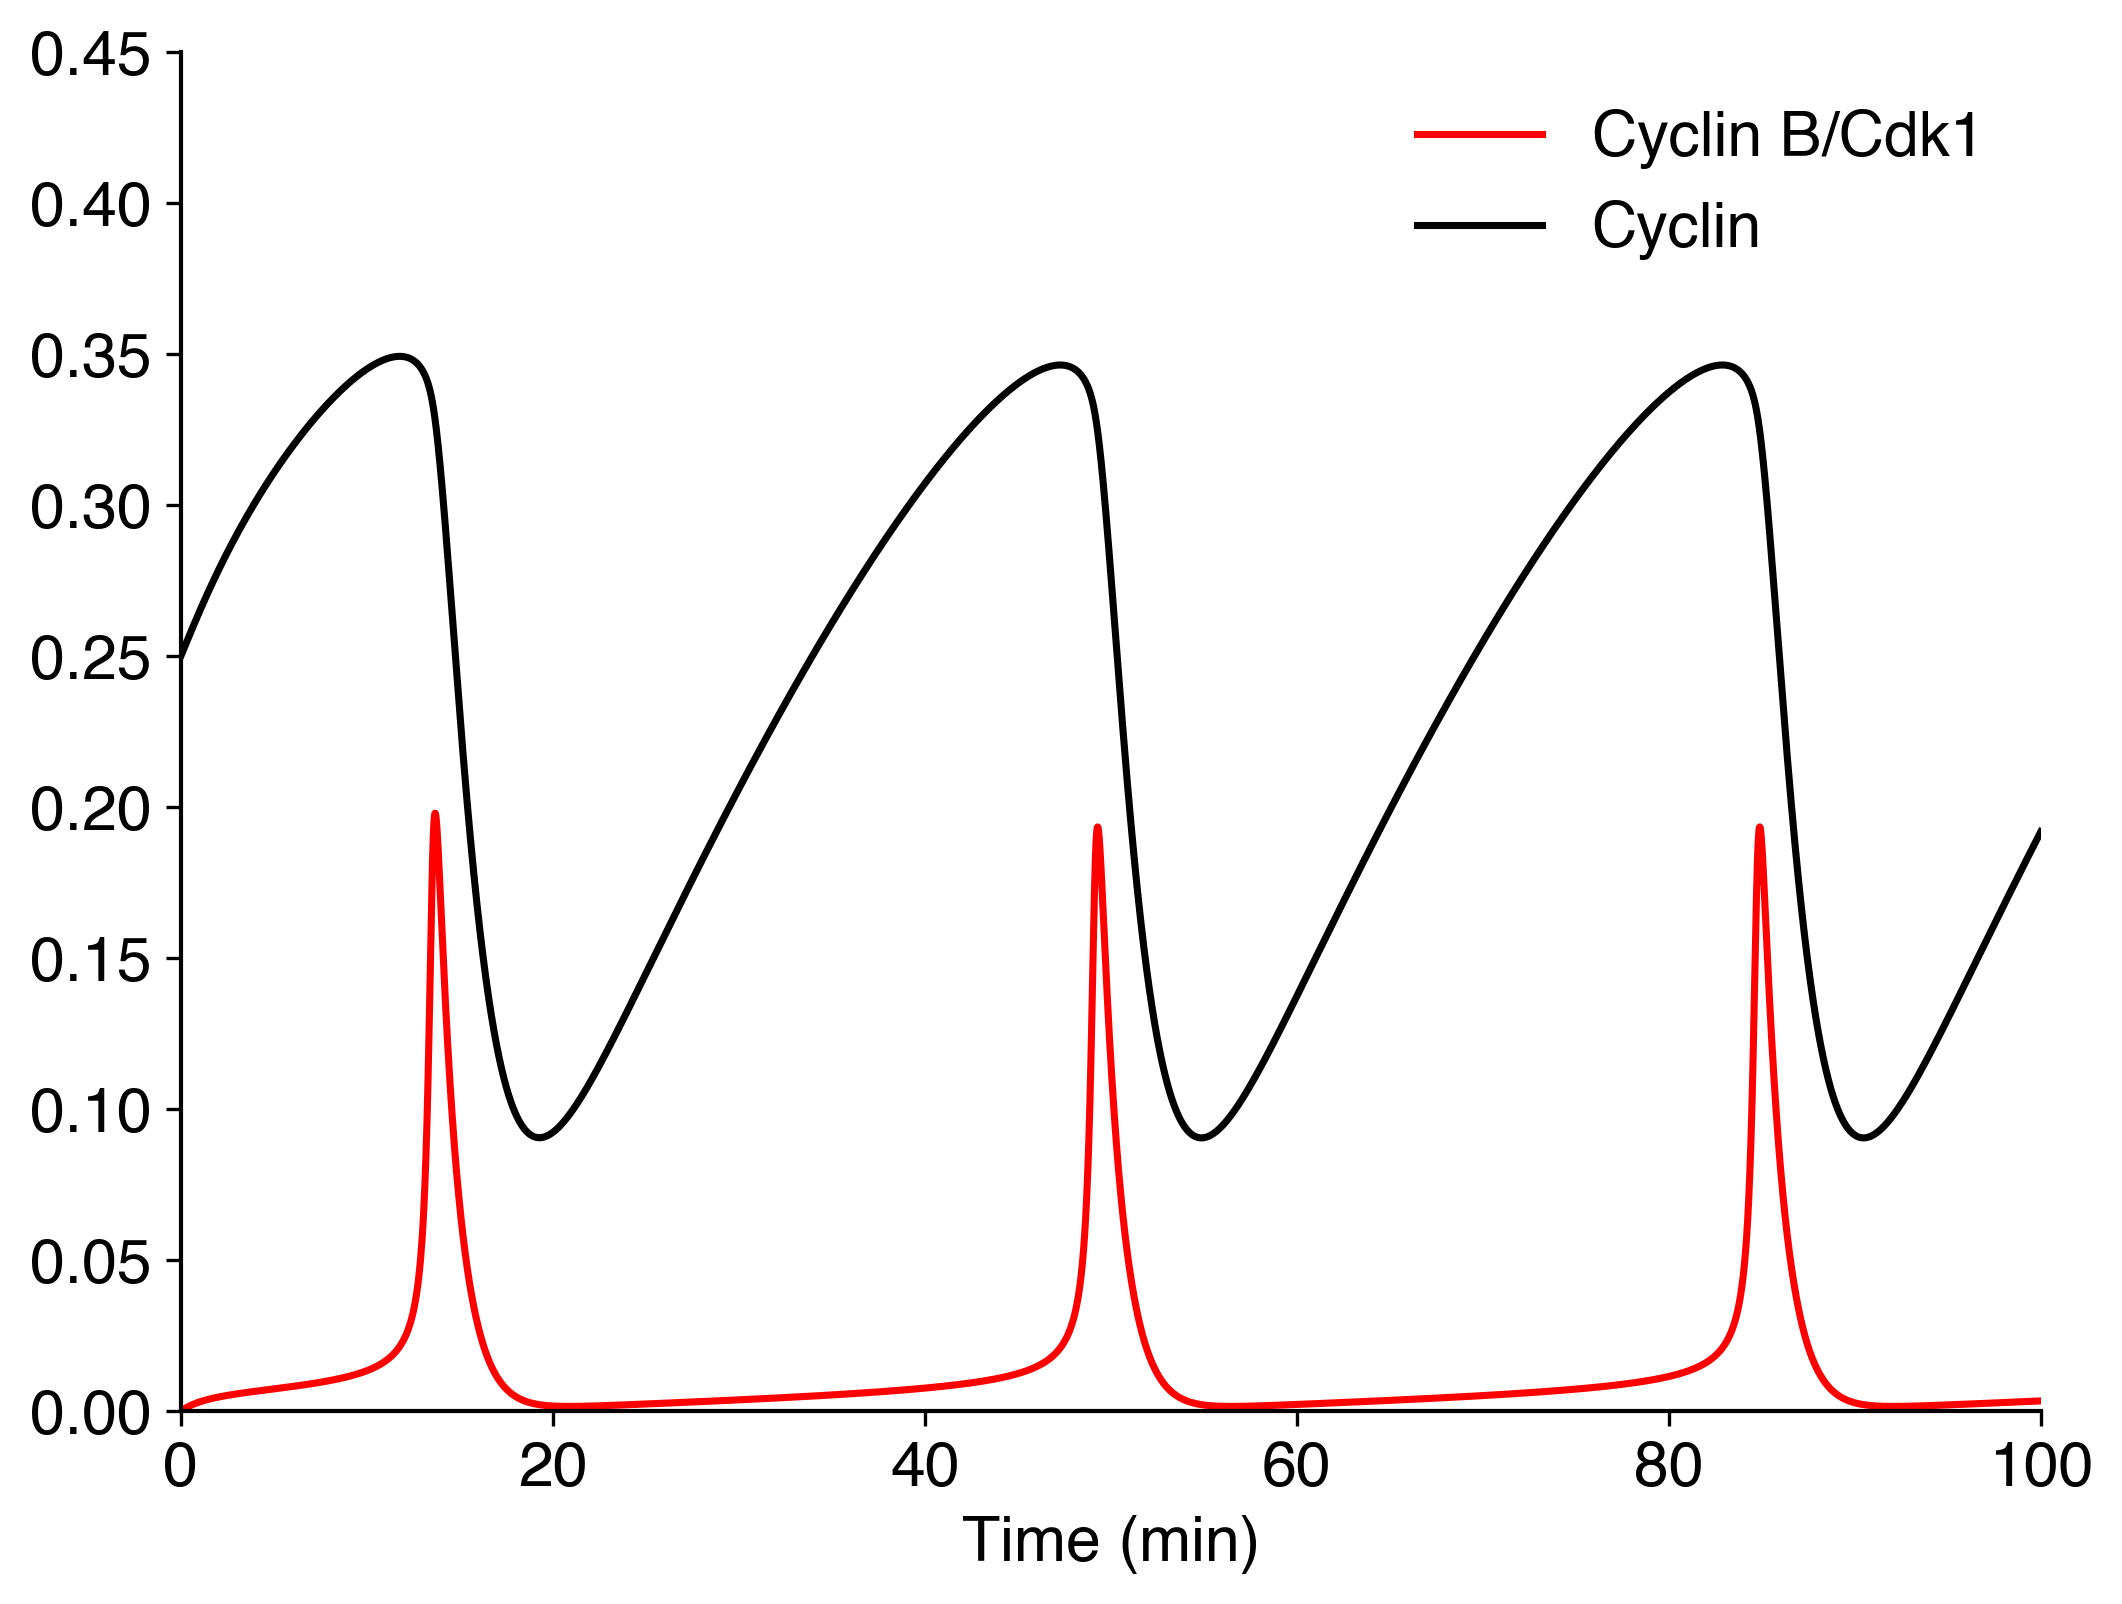

In [8]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(1,1,1)
plt.yticks(fontproperties='Helvetica', size=15, weight='bold')
plt.xticks(fontproperties='Helvetica', size=15, weight='bold')
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
ax.set_xlabel('Time (min)',fontproperties='Helvetica', size=15, weight='bold')
ax.set_ylabel('')
ax.set_title('')
ax.plot(t_obs, du_obs, '-',label='Cyclin B/Cdk1',color='r', linewidth=1.7)
#ax.plot(t_obs, dv_obs, '-',label='([Y]+[pM]+[M])/[CT]',color='b')
ax.plot(t_obs, dy_obs, '-',label='Cyclin',color='k', linewidth=1.7)
#ax.plot(t_obs[peaku], du_obs[peaku],"xk")
#ax.plot(t_obs[peaky], dy_obs[peaky], "xr")
#ax.plot(t_obs[troughu], du_obs[troughu],"vk")
#ax.plot(t_obs[troughy], dy_obs[troughy],"^r")
ax.set_xlim(0,100)
ax.set_ylim(0,0.45)
ax.spines['right'].set_visible(False)	#remove right
ax.spines['top'].set_visible(False)	#remove top
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Helvetica',
                                   weight='bold',
                                   style='normal', size=15)
ax.legend(prop=font, frameon=False)
#plt.savefig('3a变.png',dpi=600)

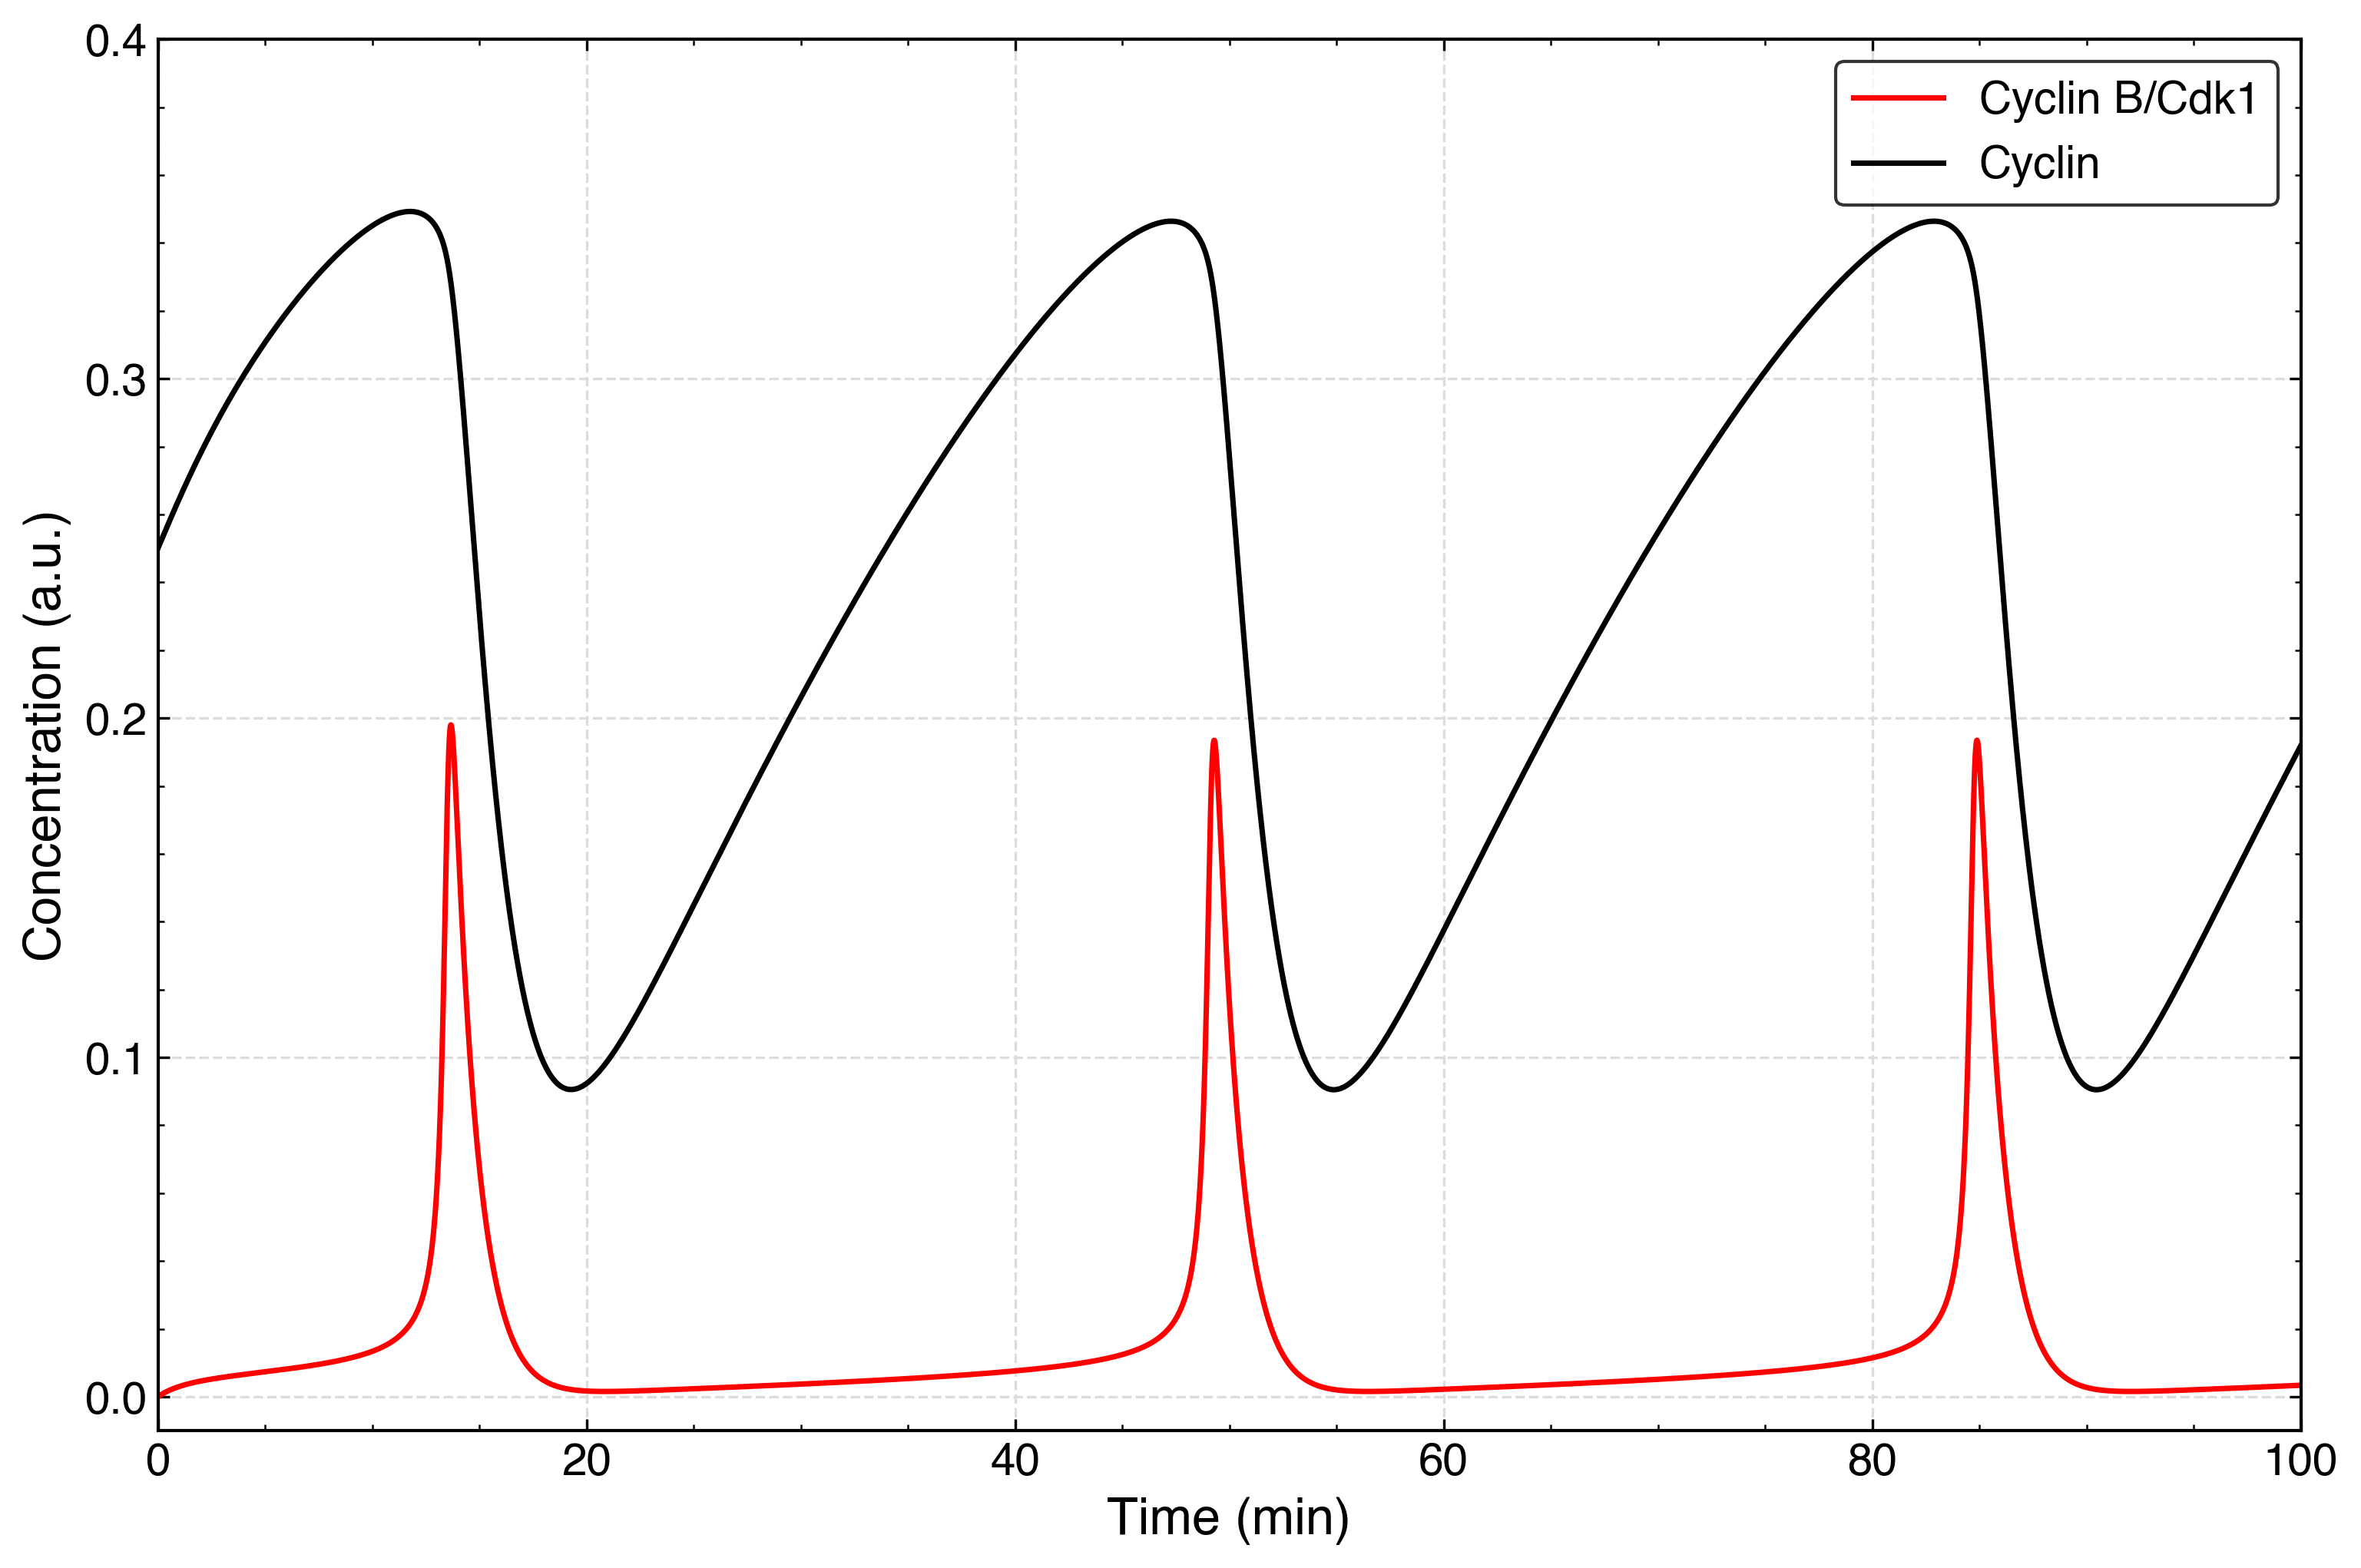

In [13]:
import matplotlib.font_manager as font_manager
fig = plt.figure(figsize=(12, 8), dpi=300)
ax = fig.add_subplot(1,1,1)
plt.tick_params(which='both',top=True,bottom=True,left=True,right=True)
plt.yticks(fontproperties='Helvetica', size=14, weight='normal')
plt.xticks(fontproperties='Helvetica', size=14, weight='normal')
ax.minorticks_on() #turn on sub-tick
plt.grid(c='gainsboro',linestyle='--')
plt.rcParams['xtick.direction']='in' # tick direction
plt.rcParams['ytick.direction']='in'
ax.set_xlabel('Time (min)',fontproperties='Helvetica', size=16, weight='normal')
ax.set_ylabel('Concentration (a.u.)',fontproperties='Helvetica', size=16, weight='normal')
ax.set_title('')
#ax.plot(t_obs, dMd_obs, '-',label='CyclinD / Cdk4-6',color='r', linewidth=1.8)
#ax.plot(t_obs, dE2F_obs, '-',label='E2F',color='b')
ax.plot(t_obs, du_obs, '-',label='Cyclin B/Cdk1',color='r', linewidth=1.7)
#ax.plot(t_obs, dMa_obs, '-',label='CyclinA/Cdk2',color='g', linewidth=1.8)
ax.plot(t_obs, dy_obs, '-',label='Cyclin',color='k', linewidth=1.7)
#ax.plot(t_obs, dCdc20_obs, '-',label='Cdc20',color='firebrick', linewidth=1.8)
#ax.plot(t_obs[peake], dMe_obs[peake],"xk")
#ax.plot(t_obs[peakb], dMb_obs[peakb], "xr")
#ax.plot(t_obs[troughe], dMe_obs[troughe],"vk")
#ax.plot(t_obs[troughb], dMb_obs[troughb],"^r")
ax.set_xticks(np.arange(0,101,20))
ax.set_yticks(np.arange(0,0.41,0.1))
ax.set_xlim(0,100)
ax.set_ylim(-0.01,0.4)
#ax.spines['right'].set_visible(False)	#remove right
#ax.spines['top'].set_visible(False)	#remove top
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
font = font_manager.FontProperties(family='Helvetica',
                                   weight='normal',
                                   style='normal', size=14)
ax.legend(prop=font, frameon=True, loc='best',edgecolor='k',facecolor='w')
#plt.annotate('1 PF on G1/S',xy=(120,0.9),xycoords='data',textcoords='data',xytext=(+123.5,+1.12),fontsize=16,weight='normal',family='Helvetica')
#plt.savefig('3f.png',dpi=300)